# Analisis Exploratorio

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
#lectura de datos
df_resultados=pd.read_csv('./data_imputada/resultados.csv',sep=',')
df_resultados


,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad,IdCarrera,AREA,Merito
0,1653,"HURTADO SEVILLANO, RAPHAEL OSWALDO",MEDICINA HUMANA,1477.500,1.0,ALCANZO VACANTE,0,11,A,1.0
1,1060,"DE LA CRUZ PALOMINO, CHRISTIAN JHOAN",MEDICINA HUMANA,1426.500,2.0,ALCANZO VACANTE,0,11,A,2.0
2,266,"ARRUNÁTEGUI ALIAGA, NATALIA HARUMI",MEDICINA HUMANA,1410.750,3.0,ALCANZO VACANTE,0,11,A,3.0
3,3463,"TORRES PALMA, CARLOS DANIEL",MEDICINA HUMANA,1409.625,4.0,ALCANZO VACANTE,0,11,A,4.0
4,3824,"ZUTA ROJAS, LUIS ROSENDO",MEDICINA HUMANA,1387.375,5.0,ALCANZO VACANTE,0,11,A,5.0
...,...,...,...,...,...,...,...,...,...,...
25089,24358,"ARAUJO HUAMANI, PIERO ISAAC",INGENIERÍA DE SISTEMAS,259.750,NaN,NO INGRESO,10,201,C,12.0
25090,25092,"GARCIA MARIÑO, CHRISTIAN JESÚS",INGENIERÍA DE SOFTWARE,542.375,2.0,ALCANZO VACANTE,10,202,C,1.0
25091,25090,"CARHUA PEREZ, SHERITH OLENKA",INGENIERÍA DE SOFTWARE,542.375,1.0,ALCANZO VACANTE,10,202,C,2.0
25092,25093,"SACHA HUAMAN, RAÍ EDSON",INGENIERÍA DE SOFTWARE,457.000,NaN,NO INGRESO,10,202,C,3.0


In [119]:
df_carreras=pd.read_csv('./data_imputada/carreras.csv',sep=',')
df_carreras.head()

,IdCarrera,CARRERA,AREA
0,11,MEDICINA HUMANA,A
1,12,OBSTETRICIA,A
2,13,ENFERMERÍA,A
3,141,TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA,A
4,142,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,A


In [120]:
df_modalidad=pd.read_csv('./data_imputada/modalidad.csv',sep=',')
df_modalidad.head()

,id_modalidad,Modalidad
0,0,educación básica regular (ebr) y educación bás...
1,1,primeros puestos de educación secundaria
2,2,traslado interno
3,3,graduados o titulados
4,4,traslado externo nacional


In [121]:
# Opteniendo la 5 carreras con mayor puntaje final
df_resultados_desnormalizada=pd.merge(df_resultados,df_carreras,how='left',on='IdCarrera')
df_resultados_desnormalizada

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad,IdCarrera,AREA_x,Merito,CARRERA,AREA_y
0,1653,"HURTADO SEVILLANO, RAPHAEL OSWALDO",MEDICINA HUMANA,1477.500,1.0,ALCANZO VACANTE,0,11,A,1.0,MEDICINA HUMANA,A
1,1060,"DE LA CRUZ PALOMINO, CHRISTIAN JHOAN",MEDICINA HUMANA,1426.500,2.0,ALCANZO VACANTE,0,11,A,2.0,MEDICINA HUMANA,A
2,266,"ARRUNÁTEGUI ALIAGA, NATALIA HARUMI",MEDICINA HUMANA,1410.750,3.0,ALCANZO VACANTE,0,11,A,3.0,MEDICINA HUMANA,A
3,3463,"TORRES PALMA, CARLOS DANIEL",MEDICINA HUMANA,1409.625,4.0,ALCANZO VACANTE,0,11,A,4.0,MEDICINA HUMANA,A
4,3824,"ZUTA ROJAS, LUIS ROSENDO",MEDICINA HUMANA,1387.375,5.0,ALCANZO VACANTE,0,11,A,5.0,MEDICINA HUMANA,A
...,...,...,...,...,...,...,...,...,...,...,...,...
25674,24358,"ARAUJO HUAMANI, PIERO ISAAC",INGENIERÍA DE SISTEMAS,259.750,NaN,NO INGRESO,10,201,C,12.0,INGENIERÍA DE SISTEMAS,C
25675,25092,"GARCIA MARIÑO, CHRISTIAN JESÚS",INGENIERÍA DE SOFTWARE,542.375,2.0,ALCANZO VACANTE,10,202,C,1.0,INGENIERÍA DE SOFTWARE,C
25676,25090,"CARHUA PEREZ, SHERITH OLENKA",INGENIERÍA DE SOFTWARE,542.375,1.0,ALCANZO VACANTE,10,202,C,2.0,INGENIERÍA DE SOFTWARE,C
25677,25093,"SACHA HUAMAN, RAÍ EDSON",INGENIERÍA DE SOFTWARE,457.000,NaN,NO INGRESO,10,202,C,3.0,INGENIERÍA DE SOFTWARE,C


In [122]:
#top las 5 carreras con mayor canidad de postulantes
carreras_mayor_postulantes=df_resultados.groupby('ESCUELA PROFESIONAL')['ESCUELA PROFESIONAL','PUNTAJE FINAL'].count().sort_values(by='PUNTAJE FINAL',ascending=False).head(5)

/tmp/ipykernel_353/2637128110.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  carreras_mayor_postulantes=df_resultados.groupby('ESCUELA PROFESIONAL')['ESCUELA PROFESIONAL','PUNTAJE FINAL'].count().sort_values(by='PUNTAJE FINAL',ascending=False).head(5)


In [123]:
carreras_mayor_postulantes=carreras_mayor_postulantes.index

In [124]:
carreras_mayor_postulantes

Index(['MEDICINA HUMANA', 'DERECHO', 'INGENIERÍA DE SISTEMAS', 'PSICOLOGÍA',
       'INGENIERÍA INDUSTRIAL'],
      dtype='object', name='ESCUELA PROFESIONAL')

In [125]:
df_trabajo=df_resultados_desnormalizada.copy()

In [126]:
df_trabajo=df_trabajo[df_trabajo['IdModalidad']==0]

In [127]:
df_top5=df_trabajo[df_trabajo['ESCUELA PROFESIONAL'].isin(carreras_mayor_postulantes)]

<Axes: xlabel='PUNTAJE FINAL', ylabel='CARRERA'>

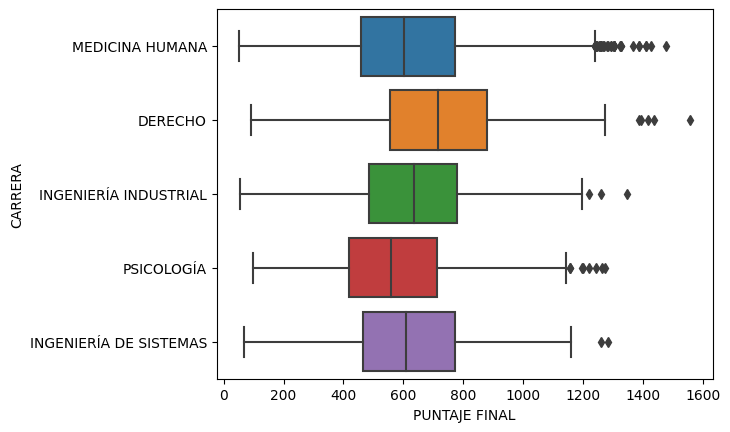

In [128]:
#promedio de los postulantes a las 5 carreras mas demandadas 
sns.boxplot(data=df_top5,x='PUNTAJE FINAL',y='CARRERA')

<Axes: xlabel='PUNTAJE FINAL', ylabel='CARRERA'>

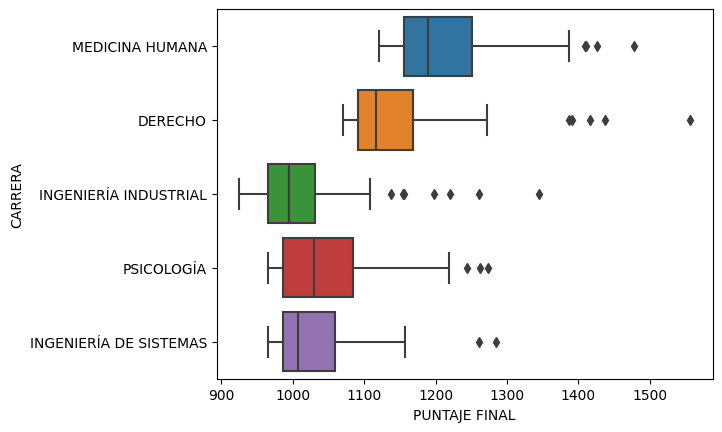

In [129]:
#promedio de los postulantes que INGRESARON a las 5 carreras mas demandadas 
sns.boxplot(data=df_top5[df_top5['OBSERVACIÓN']=='ALCANZO VACANTE'],x='PUNTAJE FINAL',y='CARRERA')

<Axes: xlabel='PUNTAJE FINAL', ylabel='AREA_x'>

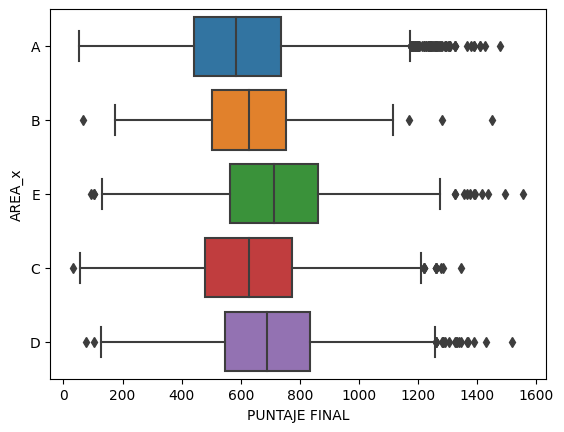

In [130]:
#analisis del puntaaje promedio por area
sns.boxplot(data=df_trabajo,x='PUNTAJE FINAL',y='AREA_x')

<Axes: xlabel='PUNTAJE FINAL', ylabel='AREA_x'>

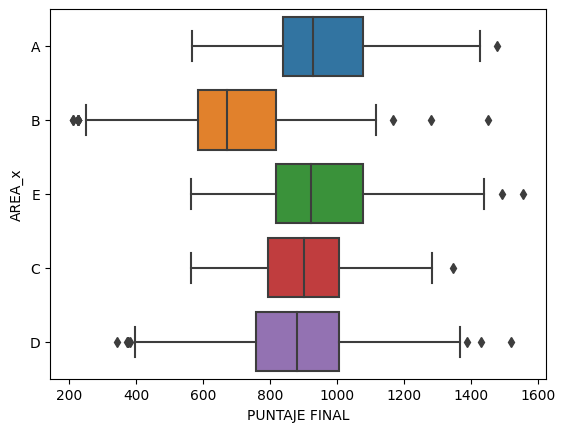

In [131]:
#promedio de notas de los ingresantes por area 
sns.boxplot(data=df_trabajo[df_trabajo['OBSERVACIÓN']=='ALCANZO VACANTE'],x='PUNTAJE FINAL',y='AREA_x')

In [143]:
#hallando las carreras con mayor puntaje en el examen de admision 
top5_max=df_trabajo.sort_values(by='PUNTAJE FINAL',ascending=False).head(15).drop_duplicates(subset='ESCUELA PROFESIONAL')
top5_max

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad,IdCarrera,AREA_x,Merito,CARRERA,AREA_y
6267,7698,"ROJAS BENITES, CAMILA JIMENA",DERECHO,1556.375,1.0,ALCANZO VACANTE,0,22,E,1.0,DERECHO,E
15409,15763,"QUIJANO PALOMINO, SANTIAGO ALEJANDRO",ECONOMÍA,1518.625,1.0,ALCANZO VACANTE,0,121,D,1.0,ECONOMÍA,D
9087,9165,"MENDOZA LLANTAY, OHARA ANDONY",COMUNICACIÓN SOCIAL,1493.000,1.0,ALCANZO VACANTE,0,35,E,1.0,COMUNICACIÓN SOCIAL,E
0,1653,"HURTADO SEVILLANO, RAPHAEL OSWALDO",MEDICINA HUMANA,1477.500,1.0,ALCANZO VACANTE,0,11,A,1.0,MEDICINA HUMANA,A
13929,13874,"ARTEAGA ALARCÓN, JESÚS HEGEL",GENÉTICA Y BIOTECNOLOGÍA,1450.750,1.0,ALCANZO VACANTE,0,102,B,1.0,GENÉTICA Y BIOTECNOLOGÍA,B


<Axes: xlabel='PUNTAJE FINAL', ylabel='ESCUELA PROFESIONAL'>

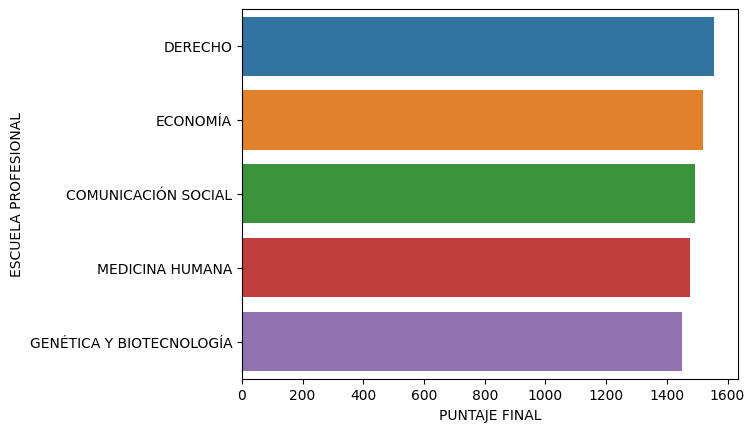

In [155]:
sns.barplot(data=top5_max,x='PUNTAJE FINAL',y='ESCUELA PROFESIONAL')

In [163]:
top5_max

,CODIGO,APELLIDOS Y NOMBRES,ESCUELA PROFESIONAL,PUNTAJE FINAL,MERITO E.P,OBSERVACIÓN,IdModalidad,IdCarrera,AREA_x,Merito,CARRERA,AREA_y
6267,7698,"ROJAS BENITES, CAMILA JIMENA",DERECHO,1556.375,1.0,ALCANZO VACANTE,0,22,E,1.0,DERECHO,E
15409,15763,"QUIJANO PALOMINO, SANTIAGO ALEJANDRO",ECONOMÍA,1518.625,1.0,ALCANZO VACANTE,0,121,D,1.0,ECONOMÍA,D
9087,9165,"MENDOZA LLANTAY, OHARA ANDONY",COMUNICACIÓN SOCIAL,1493.000,1.0,ALCANZO VACANTE,0,35,E,1.0,COMUNICACIÓN SOCIAL,E
0,1653,"HURTADO SEVILLANO, RAPHAEL OSWALDO",MEDICINA HUMANA,1477.500,1.0,ALCANZO VACANTE,0,11,A,1.0,MEDICINA HUMANA,A
13929,13874,"ARTEAGA ALARCÓN, JESÚS HEGEL",GENÉTICA Y BIOTECNOLOGÍA,1450.750,1.0,ALCANZO VACANTE,0,102,B,1.0,GENÉTICA Y BIOTECNOLOGÍA,B


TypeError: 'Figure' object is not subscriptable

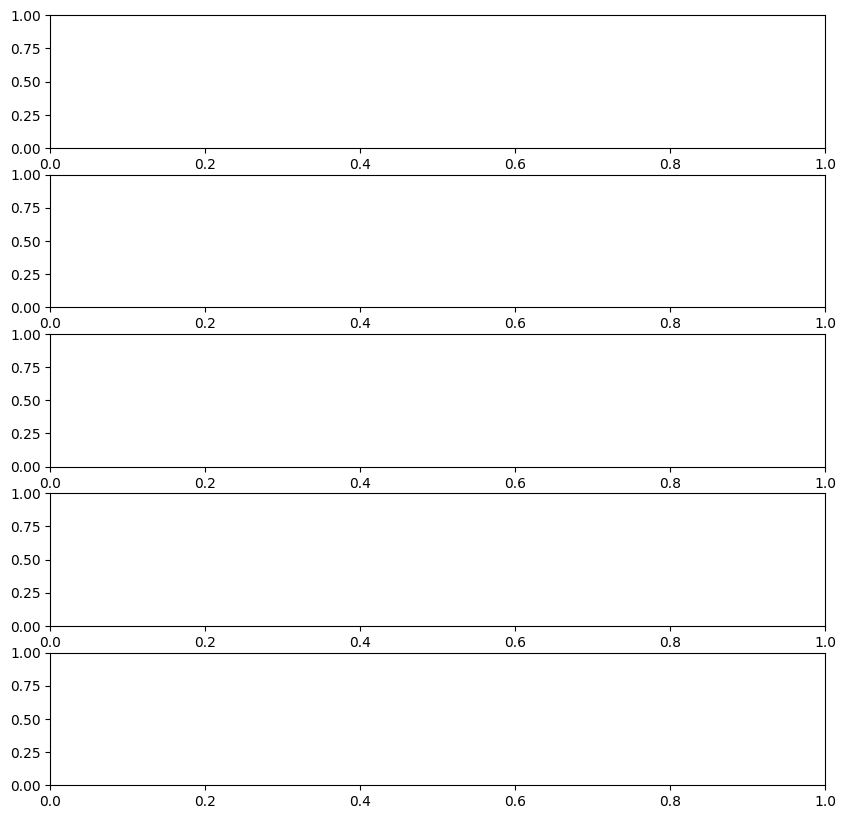

In [165]:
#tenemos que ver la distribucion de las carreras con mayor puntaje 
axes,fig=plt.subplots(5,figsize=(10,10))
for i in range(5):
    (data=df_trabajo,x='',ax=axes[i])